In [1]:
import pandas as pd

In [2]:
chosen_ramris:str = 'D:\\ESMIRA\\SPSS data\\5. CSA_T1_MRI_scores_SPSS.csv'
df = pd.read_csv(chosen_ramris, sep=';')

In [3]:
WRs = [column for column in df if column[:2]=='WR']
WRs.append('CSANUMM')
dfwr = df[WRs]  # df of wrist + csaid

In [4]:
# 需要计算所有Wrist的TSY, SYN, BME. 合并.1和.2
TSY = [column for column in dfwr if (column[2:5]=='TSY' or column=='CSANUMM')]
SYN = [column for column in dfwr if (column[2:5]=='SYN' or column=='CSANUMM')]
BME = [column for column in dfwr if (column[2:5]=='BME' or column=='CSANUMM')]
dfwr_tsy = df[TSY]
dfwr_syn = df[SYN]
dfwr_bme = df[BME]

In [5]:
# def splitreader(df:pd.DataFrame):
#     read1 = [column for column in df if (column[-2:]=='.1' or column=='CSANUMM')]
#     read2 = [column for column in df if (column[-2:]=='.2' or column=='CSANUMM')]
#     return df[read1], df[read2]

def meanreader(df:pd.DataFrame):
    meancolumn = [column[:-2] for column in df if column[-2:]=='.1']
    for col in meancolumn:
        col1, col2 = col+'.1', col+'.2'
        df.loc[:, col1] = pd.to_numeric(df[col1], errors='coerce')
        df.loc[df[col1]>10, col1] = 0
        df.loc[:, col2] = pd.to_numeric(df[col2], errors='coerce')
        df.loc[df[col2]>10, col2] = 0
        df.loc[:, col] = df[[col1, col2]].mean(axis=1, skipna=True)
    leftcolumn = ['CSANUMM']
    leftcolumn.extend(meancolumn)
    return df[leftcolumn]

In [6]:
# tsy1, tsy2 = splitreader(dfwr_tsy)
# syn1, syn2 = splitreader(dfwr_syn)
# bme1, bme2 = splitreader(dfwr_bme)
meantsy = meanreader(dfwr_tsy.copy())
meansyn = meanreader(dfwr_syn.copy())
meanbme = meanreader(dfwr_bme.copy())
# print(meantsy.head())
# print(meansyn.head())
# print(meanbme.head())

In [7]:
def sumreader(df:pd.DataFrame) ->pd.DataFrame:
    scorecolumn = [column for column in df if column!='CSANUMM']
    df['sums'] = df[scorecolumn].sum(axis=1, skipna=True)
    return df[['CSANUMM', 'sums']]

In [8]:
sumtsy:pd.DataFrame = sumreader(meantsy)  # CSANUMM, sumtsy
sumsyn:pd.DataFrame = sumreader(meansyn)
sumbme:pd.DataFrame = sumreader(meanbme)

In [9]:
tsycount = sumtsy['sums'].value_counts()
syncount = sumsyn['sums'].value_counts()
bmecount = sumbme['sums'].value_counts()

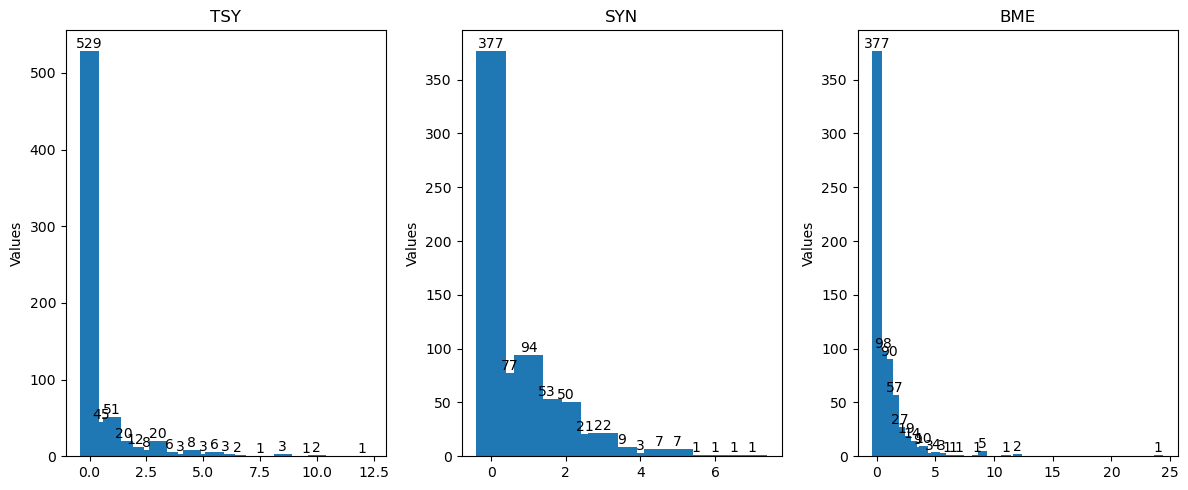

In [10]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 5))
bars1 = axs[0].bar(tsycount.index, tsycount.values)
axs[0].set_title('TSY')
axs[0].set_ylabel('Values')
# 在第一个子图上显示每个柱的值
for bar in bars1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

bars2 = axs[1].bar(syncount.index, syncount.values)
axs[1].set_title('SYN')
axs[1].set_ylabel('Values')
# 在第二个子图上显示每个柱的值
for bar in bars2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

bars3 = axs[2].bar(bmecount.index, bmecount.values)
axs[2].set_title('BME')
axs[2].set_ylabel('Values')
# 在第三个子图上显示每个柱的值
for bar in bars3:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')


plt.tight_layout()
plt.show()

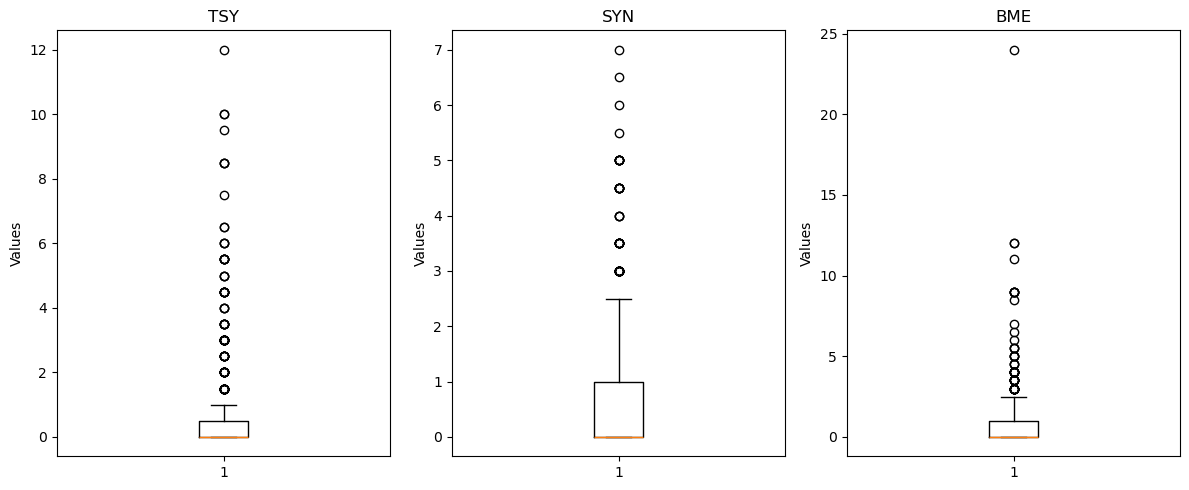

In [11]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 5))
axs[0].boxplot(sumtsy['sums'].values)
axs[0].set_title('TSY')
axs[0].set_ylabel('Values')

axs[1].boxplot(sumsyn['sums'].values)
axs[1].set_title('SYN')
axs[1].set_ylabel('Values')

axs[2].boxplot(sumbme['sums'].values)
axs[2].set_title('BME')
axs[2].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [12]:
# get the CSANUMM
def getsample(df:pd.DataFrame, bin:list, numsample:int=2):
    # 定义函数，根据分数将数据分组，每2分为一个组
    df['group'] = pd.cut(df['sums'], bins=bin, right=False)
    # 对每个分数区间分组，并在每个组中采样 2 个样本
    sampled_df = df.groupby('group').apply(lambda x: x.sample(numsample, random_state=42))
    # 删除 group 分组后的多余层
    sampled_df = sampled_df.reset_index(drop=True)
    return sampled_df

In [13]:
sampletsy = getsample(sumtsy, bin=[0, 1, 2, 4, 12], numsample=12)
samplesyn = getsample(sumsyn, bin=[0, 1, 2, 6], numsample=15)
samplebme = getsample(sumbme, bin=[0, 1, 2, 3, 15], numsample=12)
# print(samplesyn)

C:\Users\yli5\AppData\Local\Temp\ipykernel_5444\2176513423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = pd.cut(df['sums'], bins=bin, right=False)
C:\Users\yli5\AppData\Local\Temp\ipykernel_5444\2176513423.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampled_df = df.groupby('group').apply(lambda x: x.sample(numsample, random_state=42))
C:\Users\yli5\AppData\Local\Temp\ipykernel_5444\2176513423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [14]:
def merge(df1:pd.DataFrame, df2:pd.DataFrame, df3:pd.DataFrame):
    res = df1.merge(df2, on='CSANUMM', how='inner').merge(df3, on='CSANUMM', how='inner')  # tsy+syn+bme
    return res

In [15]:
res = merge(sumtsy, sumsyn, sumbme)
print(res.head(10))
print(f'merged: {res.shape}, tsy: {sumtsy.shape}, syn: {sumsyn.shape}, bme: {sumbme.shape}')

   CSANUMM sums_x group_x  sums_y group_y  sums    group
0        1    1.0  [1, 2)     0.0  [0, 1)   1.5   [1, 2)
1        2    0.5  [0, 1)     1.0  [1, 2)   0.0   [0, 1)
2        3    0.0  [0, 1)     0.0  [0, 1)   0.5   [0, 1)
3        4    0.0  [0, 1)     0.0  [0, 1)   2.5   [2, 3)
4        5    0.0  [0, 1)     2.0  [2, 6)   4.5  [3, 15)
5        6    2.5  [2, 4)     0.5  [0, 1)   0.0   [0, 1)
6        7    0.0  [0, 1)     0.5  [0, 1)   0.0   [0, 1)
7        8    0.5  [0, 1)     0.5  [0, 1)   0.0   [0, 1)
8        9    0.0  [0, 1)     1.5  [1, 2)   0.5   [0, 1)
9       10    0.0  [0, 1)     0.0  [0, 1)   0.0   [0, 1)
merged: (724, 7), tsy: (724, 3), syn: (724, 3), bme: (724, 3)


   CSANUMM allsum sums_x  sums_y  sums
0        1    2.5    1.0     0.0   1.5
1        2    1.5    0.5     1.0   0.0
2        3    0.5    0.0     0.0   0.5
3        4    2.5    0.0     0.0   2.5
4        5    6.5    0.0     2.0   4.5
5        6    3.0    2.5     0.5   0.0
6        7    0.5    0.0     0.5   0.0
7        8    1.0    0.5     0.5   0.0
8        9    2.0    0.0     1.5   0.5
9       10    0.0    0.0     0.0   0.0


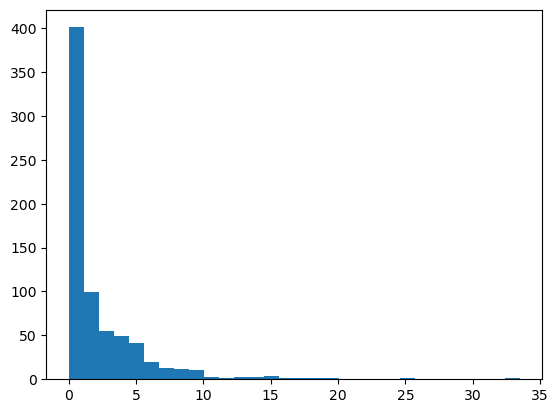

In [16]:
import matplotlib.pyplot as plt
def sumreader2(df:pd.DataFrame) ->pd.DataFrame:
    scorecolumn = [column for column in df if 'sums' in column]
    df['allsum'] = df[scorecolumn].sum(axis=1, skipna=True)
    return df[['CSANUMM', 'allsum', 'sums_x', 'sums_y', 'sums']]

res = sumreader2(res)
print(res.head(10))
plt.hist(res.allsum.values, bins=30)
plt.show()

In [19]:
def getsample2(df:pd.DataFrame, bin:list, numsample:int=2):
    # 定义函数，根据分数将数据分组，每2分为一个组
    df['group'] = pd.cut(df['allsum'], bins=bin, right=False)
    # print(df.head(20))
    # 对每个分数区间分组，并在每个组中采样 2 个样本
    sampled_df = df.groupby('group').apply(lambda x: x.sample(numsample, random_state=42))
    # 删除 group 分组后的多余层
    sampled_df = sampled_df.reset_index(drop=True)
    return sampled_df

item = getsample2(res, bin=[0, 1, 2, 3, 4, 6, 8, 12, 35], numsample=15)
print(item.shape)
# print(item.sort_values(by='allsum', ascending=True).head(20))
print(item.CSANUMM.to_list())

(120, 6)
[636, 25, 154, 162, 66, 165, 274, 528, 712, 122, 204, 473, 501, 313, 497, 87, 534, 835, 607, 627, 375, 98, 225, 185, 310, 484, 795, 101, 814, 489, 382, 213, 16, 102, 426, 399, 765, 46, 787, 112, 257, 737, 329, 1, 770, 510, 674, 455, 686, 421, 628, 307, 367, 161, 447, 265, 145, 251, 656, 569, 600, 696, 52, 500, 85, 440, 247, 202, 322, 766, 679, 142, 478, 217, 429, 796, 401, 622, 448, 206, 270, 519, 550, 326, 5, 108, 403, 116, 332, 311, 243, 333, 248, 585, 42, 275, 513, 526, 292, 602, 129, 188, 197, 130, 476, 71, 176, 335, 131, 291, 598, 135, 431, 560, 722, 133, 314, 781, 156, 356]


C:\Users\yli5\AppData\Local\Temp\ipykernel_5444\1873009240.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampled_df = df.groupby('group').apply(lambda x: x.sample(numsample, random_state=42))


In [ ]:
# count the score for each
def gethist(df):
    # 创建一个图形和子图（3行1列的子图）
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))

    # 绘制 sums 列的直方图
    axs[0].hist(df['sums_x'], bins=8, edgecolor='black', alpha=0.7)
    axs[0].set_title('Histogram of TSY')
    axs[0].set_xlabel('sums')
    axs[0].set_ylabel('Frequency')

    # 绘制 sumx 列的直方图
    axs[1].hist(df['sums_y'], bins=8, edgecolor='black', alpha=0.7)
    axs[1].set_title('Histogram of SYN')
    axs[1].set_xlabel('sumx')
    axs[1].set_ylabel('Frequency')

    # 绘制 sumy 列的直方图
    axs[2].hist(df['sums'], bins=8, edgecolor='black', alpha=0.7)
    axs[2].set_title('Histogram of BME')
    axs[2].set_xlabel('sumy')
    axs[2].set_ylabel('Frequency')

    # 调整布局以避免重叠
    plt.tight_layout()

    # 显示图表
    plt.show()

gethist(item)